In [1]:
from lxml import etree
import glob

In [2]:
from pathlib import Path
from tqdm import tqdm

In [3]:
import pandas as pd
import numpy as np
import os,sys

In [4]:
import re

### 1.Data Loader.

In [5]:
root = Path('/nas/chenyi/datasets_nas/dada_labelme/labelme_shoebag_may/labelme_chunyu_shoebag0531/')

In [6]:
xml_list = glob.glob(str(root /'*/*.xml'))
xml_list += glob.glob(str(root /'*/*/*.xml'))
xml_list += glob.glob(str(root /'*/*/*/*.xml'))
len(xml_list)

7920

### XML

In [7]:
def voc2yolo():
    center_x = (xmin + (xmax-xmin)/2)/width
    center_y = (ymin + (ymax-ymin)/2)/height
    bdb_w = (xmax-xmin)/width
    bdb_h = (ymax-ymin)/height

In [8]:
def parse_xml(p):
    trees = etree.parse(p)
    width, height = int(trees.find('size/width').text), int(trees.find('size/height').text)
    bboxes = []
    for obj in trees.findall('object'):
        bx = []
        bx.append(p)
        bx.append(int(width))
        bx.append(int(height))
        bdb = obj.find('bndbox')
        bx.append(obj.find('name').text)
        bx.append(int(bdb.find('xmin').text))
        bx.append(int(bdb.find('ymin').text))
        bx.append(int(bdb.find('xmax').text))
        bx.append(int(bdb.find('ymax').text))
        bboxes.append(bx)
    return bboxes

### 解析XML

In [9]:
bboxes_list = []
for p in tqdm(xml_list):
    row = parse_xml(p)
    bboxes_list += row
    # break

100%|███████████████████████████████████████████████████████████████████████████| 7920/7920 [00:04<00:00, 1629.70it/s]


In [10]:
df = pd.DataFrame(bboxes_list)

In [11]:
df.head(2)

,0,1,2,3,4,5,6,7
0,/nas/chenyi/datasets_nas/dada_labelme/labelme_...,3024,4032,包,685,719,2231,3806
1,/nas/chenyi/datasets_nas/dada_labelme/labelme_...,800,800,包,206,1,650,778


In [12]:
df['man'] = df[int(df.columns[0])].apply(lambda x: re.findall('labelme_chunyu_shoebag0531/(.*?)_', x)[0])

In [13]:
df.value_counts('man')

man
liwucheng       4441
wuxingjuan      2026
huangxiaofei    1501
lifengju        1030
wanqi           1022
wuzhanjing       649
dtype: int64

In [106]:
df.to_csv('./data/shoe_bag11k_may.csv', index=False)

### 数据展示

In [11]:
sys.path.append('../../')

#### 图像路径

In [23]:
!tree -d -L 1 /home/chenyi/workspace/dataset/data/dada/shoe_bag11k_may

/home/chenyi/workspace/dataset/data/dada/shoe_bag11k_may
├── bag_setdiff
├── leisure_shoe_setdiff
└── suit_shoe_setdiff

3 directories


In [7]:
df = pd.read_csv('./data/shoe_bag11k_may.csv')

In [12]:
df['stem'] = df[df.columns[0]].apply(lambda x: Path(x).stem)

In [21]:
ROOT = Path('/home/chenyi/workspace/dataset/data/dada/shoe_bag11k_may')

In [22]:
img_list = glob.glob(str(ROOT /'*/*.jpg'))

In [23]:
img_df = pd.DataFrame()
img_df['path'] = img_list

In [25]:
img_df['stem'] = img_df['path'].apply(lambda x: Path(x).stem)

In [26]:
cross_df = df[df['stem'].isin(img_df['stem'])]

In [27]:
len(img_df), len(cross_df), len(df)

(11172, 10669, 10669)

In [28]:
img_df.head()

,path,stem
0,/home/chenyi/workspace/dataset/data/dada/shoe_...,2018031611355355318
1,/home/chenyi/workspace/dataset/data/dada/shoe_...,2017122309491487824
2,/home/chenyi/workspace/dataset/data/dada/shoe_...,2017070123363250994
3,/home/chenyi/workspace/dataset/data/dada/shoe_...,2018041817505510001
4,/home/chenyi/workspace/dataset/data/dada/shoe_...,2018091620112722156


In [29]:
gp = dict(list(img_df.groupby('stem')))

In [37]:
stem2path = {}
for path,stem in zip(img_df['path'].values, img_df['stem'].values):
    stem2path[stem] = path

In [38]:
p_list = []
for ind, row in df.iterrows():
    stem = row['stem']
    p = stem2path[stem]
    p_list.append(p)

In [39]:
len(p_list)

10669

In [42]:
 stem2path[stem]

'/home/chenyi/workspace/dataset/data/dada/shoe_bag11k_may/bag_setdiff/2018072420201679286.jpg'

In [43]:
df['img_path'] = p_list

In [60]:
df.head(2)

,0,1,2,3,4,5,6,7,man,stem,img_path,img_tpath
0,/nas/chenyi/datasets_nas/dada_labelme/labelme_...,3024,4032,包,685,719,2231,3806,lifengju,2018053014441155222,/home/chenyi/workspace/dataset/data/dada/shoe_...,/home/chenyi/workspace/dataset_clr/haowei34k/s...
1,/nas/chenyi/datasets_nas/dada_labelme/labelme_...,800,800,包,206,1,650,778,lifengju,2018031823531012935,/home/chenyi/workspace/dataset/data/dada/shoe_...,/home/chenyi/workspace/dataset_clr/haowei34k/s...


In [61]:
df.head(2).values

array([['/nas/chenyi/datasets_nas/dada_labelme/labelme_shoebag_may/labelme_chunyu_shoebag0531/lifengju_bag_1000/2018053014441155222.xml',
        3024, 4032, '包', 685, 719, 2231, 3806, 'lifengju',
        '2018053014441155222',
        '/home/chenyi/workspace/dataset/data/dada/shoe_bag11k_may/bag_setdiff/2018053014441155222.jpg',
        '/home/chenyi/workspace/dataset_clr/haowei34k/shoe_bag11k_drawed/2018053014441155222.jpg'],
       ['/nas/chenyi/datasets_nas/dada_labelme/labelme_shoebag_may/labelme_chunyu_shoebag0531/lifengju_bag_1000/2018031823531012935.xml',
        800, 800, '包', 206, 1, 650, 778, 'lifengju',
        '2018031823531012935',
        '/home/chenyi/workspace/dataset/data/dada/shoe_bag11k_may/bag_setdiff/2018031823531012935.jpg',
        '/home/chenyi/workspace/dataset_clr/haowei34k/shoe_bag11k_drawed/2018031823531012935.jpg']],
      dtype=object)

##### 存储目标

In [55]:
!tree -d -L 1 /home/chenyi/workspace/dataset_clr/

/home/chenyi/workspace/dataset_clr
└── deepfashion2_drawed

1 directory


In [56]:
!mkdir -p /home/chenyi/workspace/dataset_clr/haowei34k/shoe_bag11k_drawed

In [57]:
draw_root = Path('/home/chenyi/workspace/dataset_clr/haowei34k/shoe_bag11k_drawed')

In [104]:
name2id = {}
for ind, item in enumerate(df.value_counts(df.columns[3]).index):
    k = item[0]
    name2id[k] = ind

In [105]:
df['id'] = df[df.columns[3]].map(name2id)

In [59]:
df['img_tpath'] = df['img_path'].apply(lambda x: '{0}/{1}'.format(draw_root, Path(x).name))

In [75]:
df0 = df[(df[df.columns[1]]==0) | (df[df.columns[2]]==0)]

In [9]:
df = pd.read_csv('./data/shoe_bag11k_may.csv')

In [12]:
sys.path.append('../../')
from utils.plots.plots import draw_bbox
import cv2
from PIL import Image

In [13]:
# for ind, row in tqdm(df.iterrows()):
#     row_info = row.loc[df.columns[:8]].values
#     w,h = row_info[1], row_info[2]
#     name = row.loc[['id']].values[0]
#     bbox = list(row_info[4:8])
#     bbox.insert(0,0)
#     tp = Path(row.loc[['img_tpath']].values[0])
#     p = tp if tp.is_file() else row.loc[['img_path']].values[0]
#     img = cv2.imread(p)
#     img = draw_bbox(img, bbox)
#     cv2.imwrite(p, img)
#     # break

### Display Html

In [14]:
sys.path.append('../../')
from utils.display.html import *
from IPython.display import HTML
from io import BytesIO

In [75]:
draw_root = '/home/chenyi/workspace/dataset_clr/haowei34k/shoe_bag11k_drawed/'

In [76]:
img_list = glob.glob('/home/chenyi/workspace/yolov5/yolov5_ours/results/dect_results/det_hwpedia/all1/*.jpg')
len(img_list), img_list[-1]

(126422,
 '/home/chenyi/workspace/yolov5/yolov5_ours/results/dect_results/det_hwpedia/all1/2017092517065072309.jpg')

In [77]:
# img_list = glob.glob(draw_root + '*.jpg')
df_drawed = pd.DataFrame()
df_drawed['path'] = img_list[-100:]

In [78]:
size = 500
df_drawed['res'] = df_drawed['path'].map(lambda x: get_thumbnail(x, size))

In [79]:
f = df_drawed[['res', 'path']].to_html(formatters={'res': image_formatter}, escape=False)

,res,path
0,,/home/chenyi/workspace/yolov5/yolov5_ours/results/dect_results/det_hwpedia/all1/2017040121390572602.jpg
1,,/home/chenyi/workspace/yolov5/yolov5_ours/results/dect_results/det_hwpedia/all1/2018032810314159421.jpg
2,,/home/chenyi/workspace/yolov5/yolov5_ours/results/dect_results/det_hwpedia/all1/2017082710165818197.jpg
3,,/home/chenyi/workspace/yolov5/yolov5_ours/results/dect_results/det_hwpedia/all1/2017031316113736155.jpg
4,,/home/chenyi/workspace/yolov5/yolov5_ours/results/dect_results/det_hwpedia/all1/2017051900094007464.jpg
5,,/home/chenyi/workspace/yolov5/yolov5_ours/results/dect_results/det_hwpedia/all1/2017060823315031984.jpg
6,,/home/chenyi/workspace/yolov5/yolov5_ours/results/dect_results/det_hwpedia/all1/2018021106102214205.jpg
7,,/home/chenyi/workspace/yolov5/yolov5_ours/results/dect_results/det_hwpedia/all1/2018022220200393991.jpg
8,,/home/chenyi/workspace/yolov5/yolov5_ours/results/dect_results/det_hwpedia/all1/2017110418132111830.jpg
9,,/home/chenyi/workspace/yolov5/yolov5_ours/results/dect_results/det_hwpedia/all1/2018011003550460677.jpg

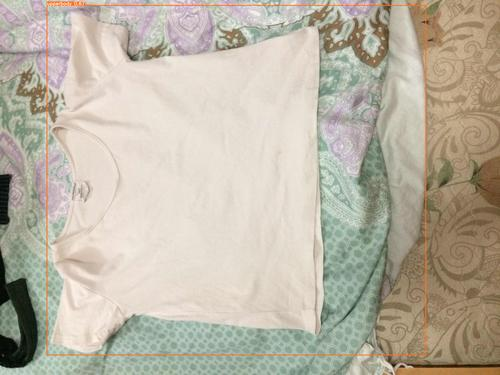
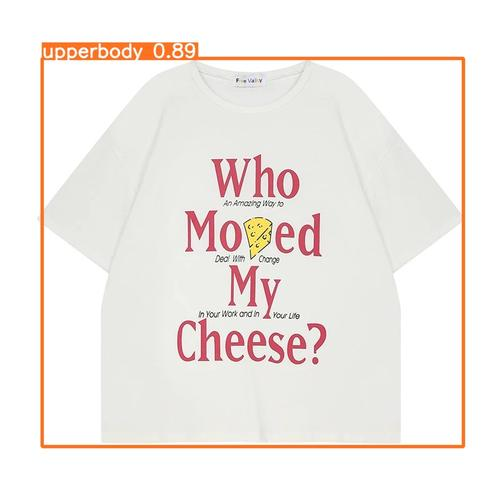
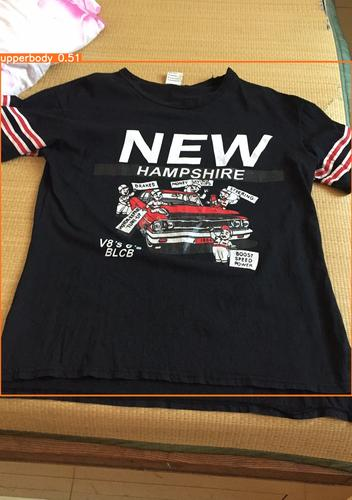
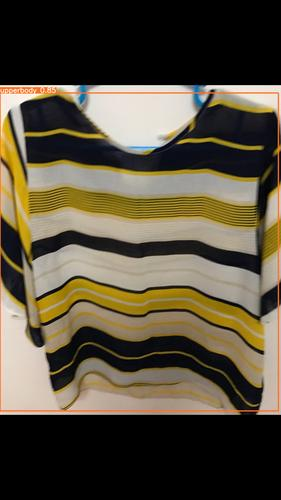
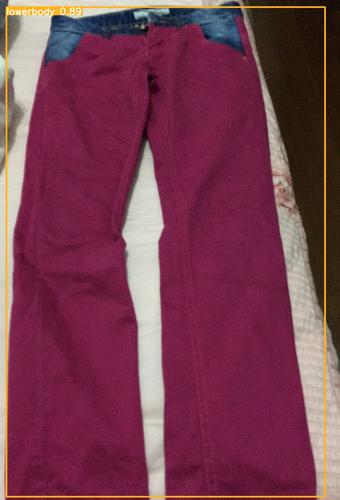
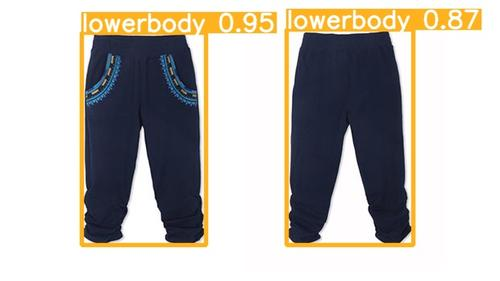
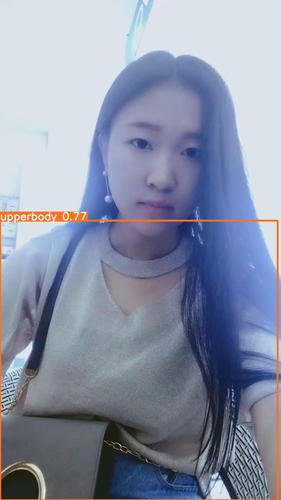
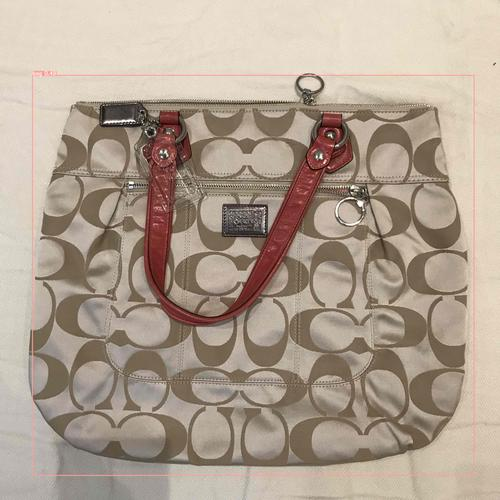
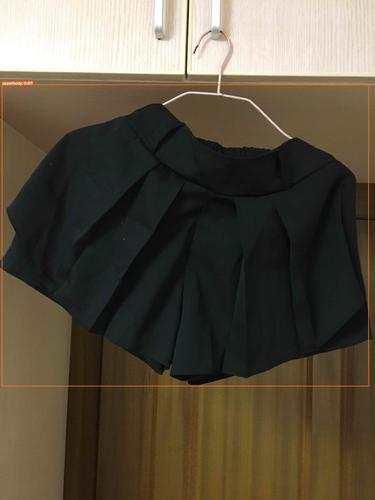
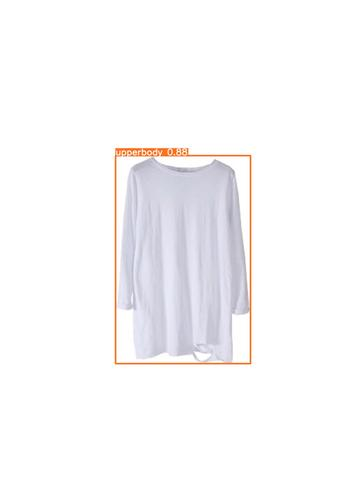
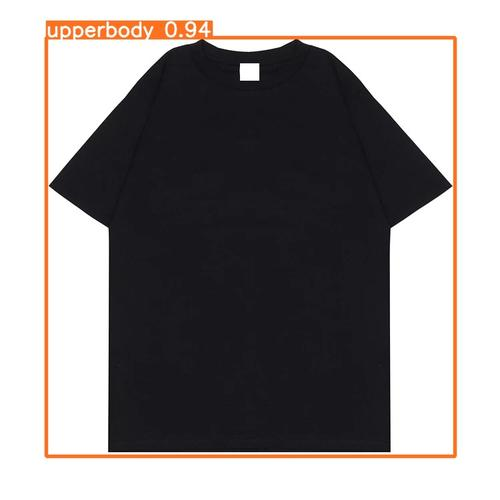
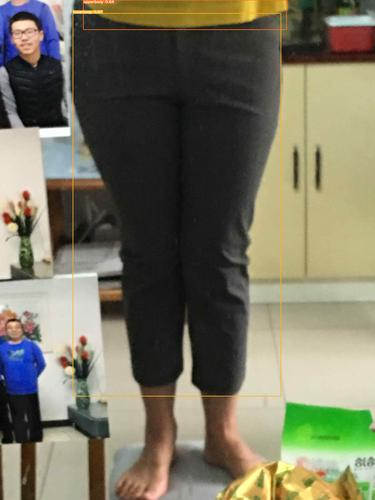
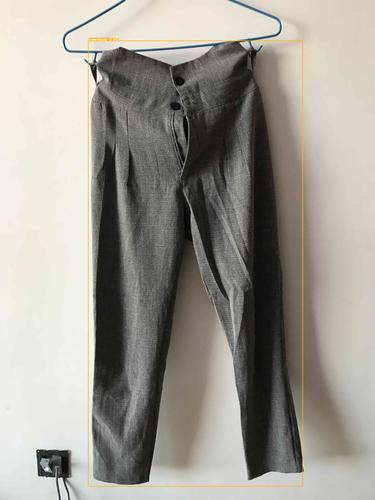
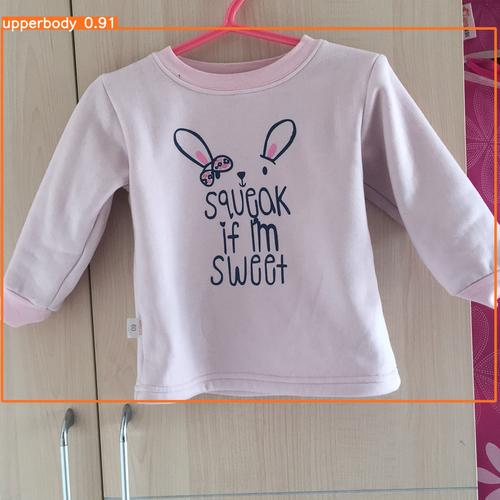
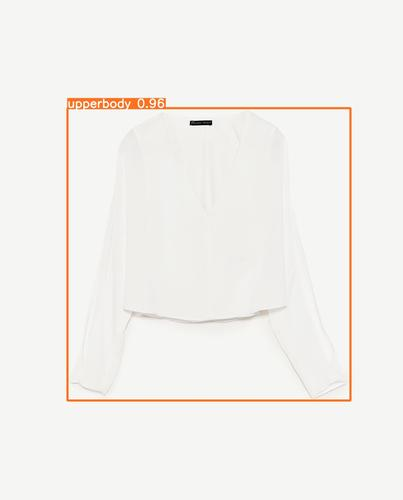
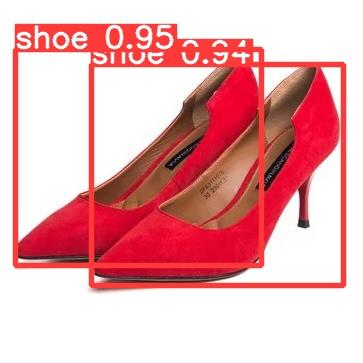
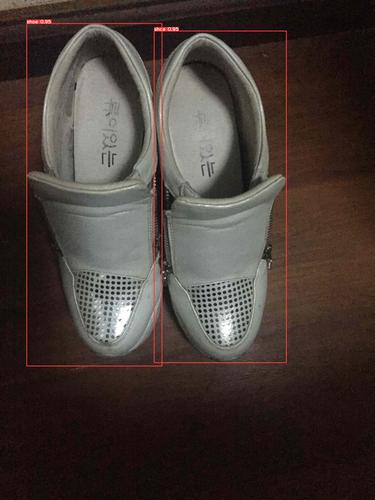
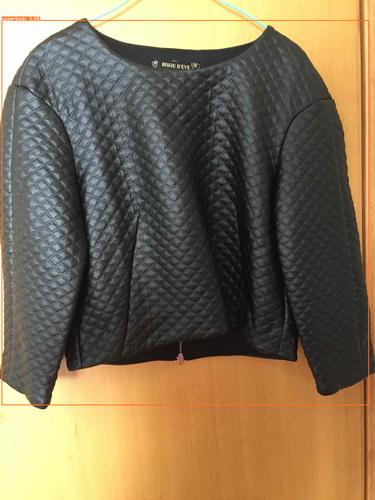
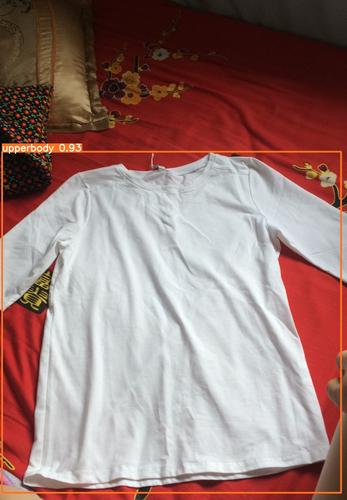
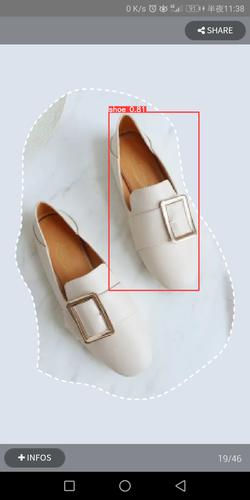
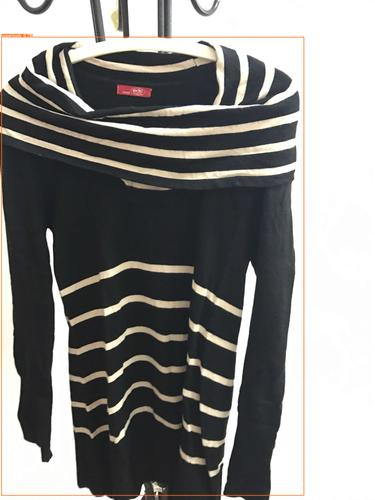
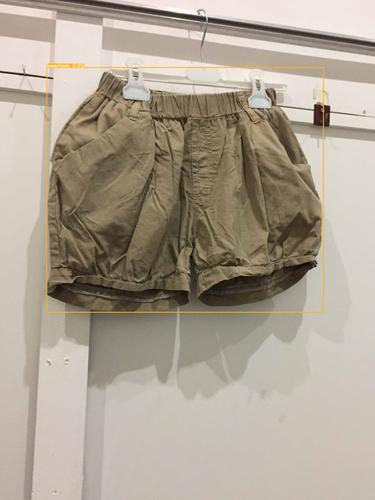
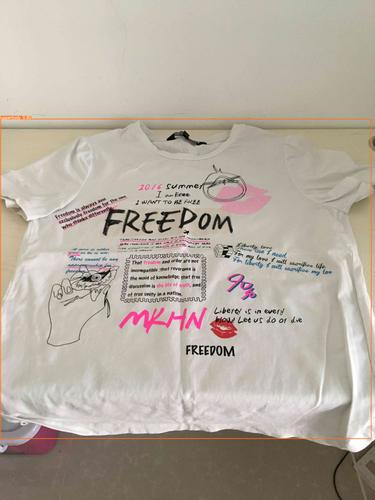
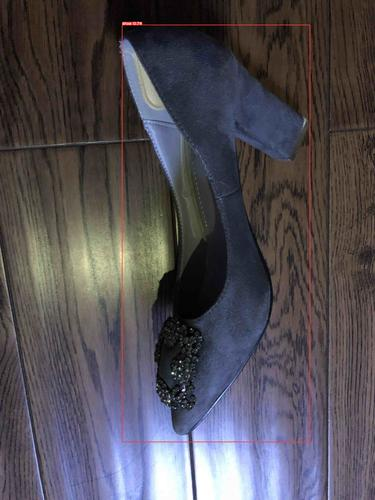
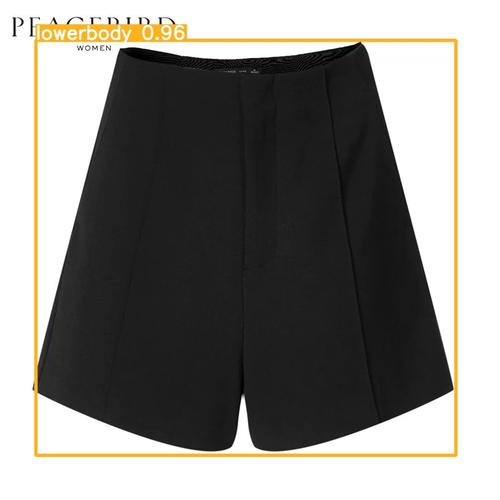
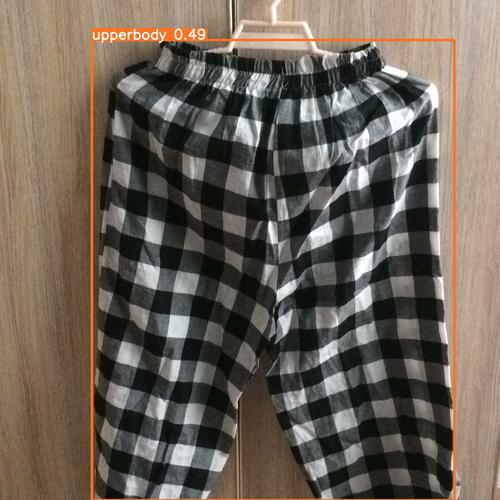
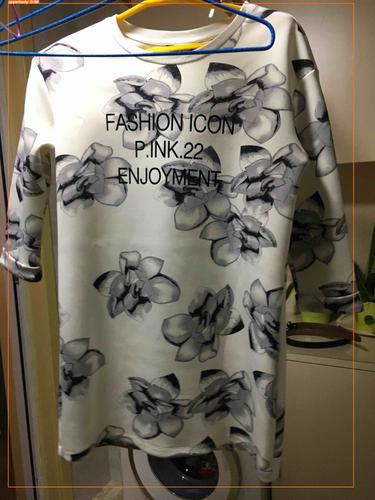
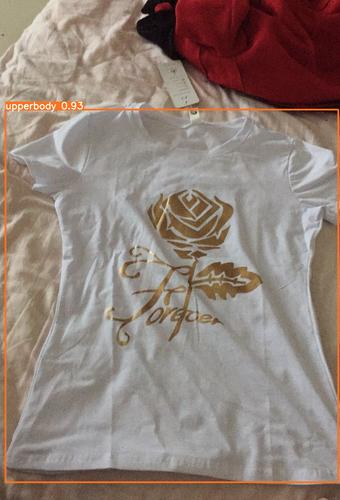
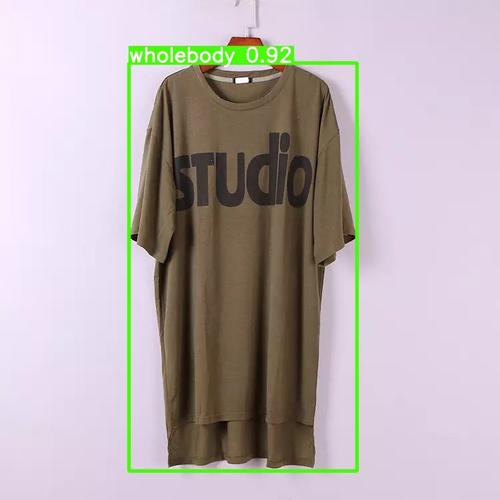
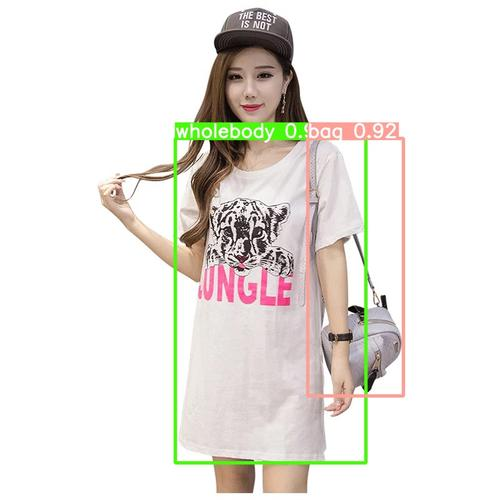
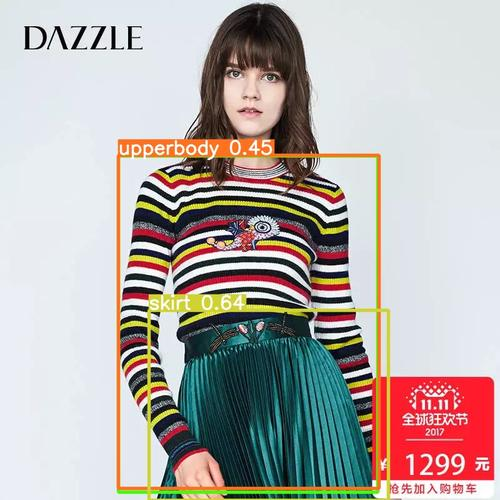
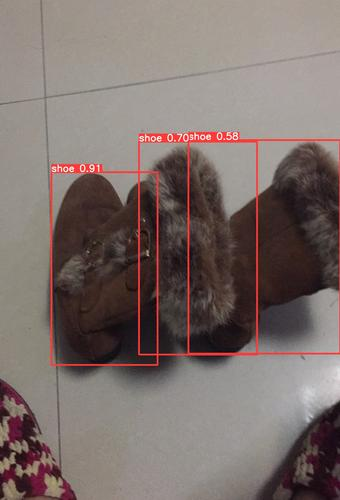
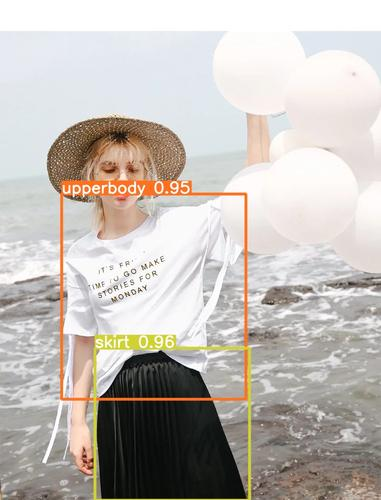
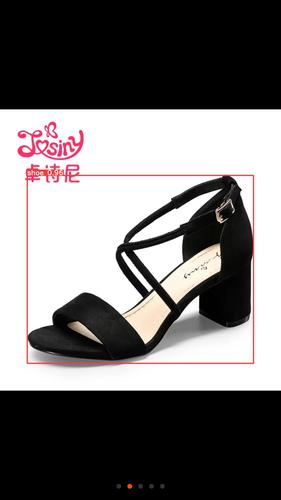
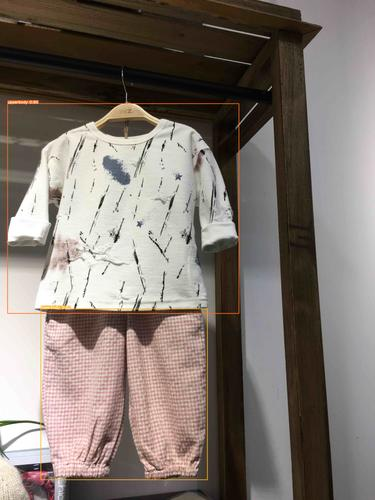
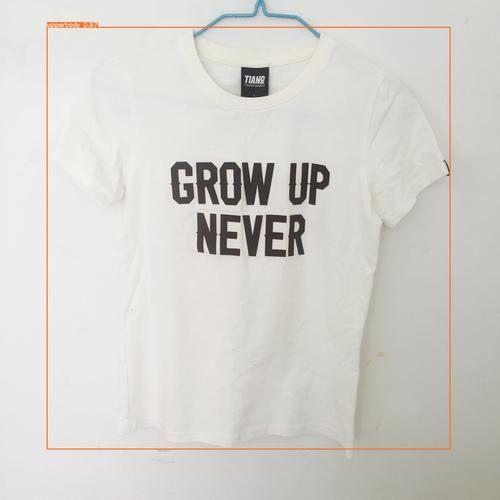
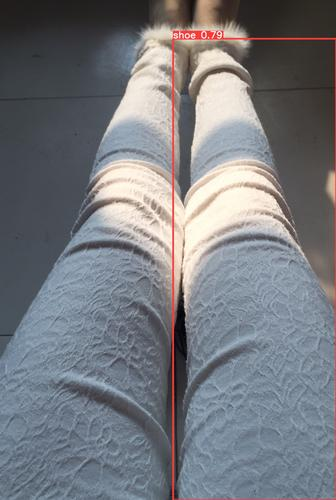
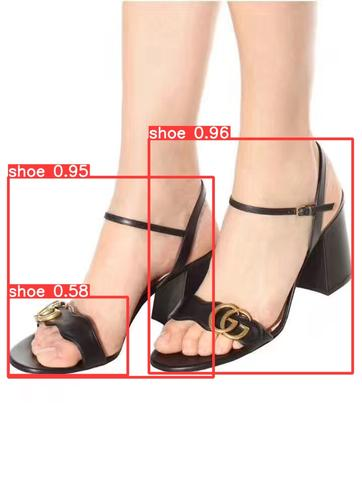
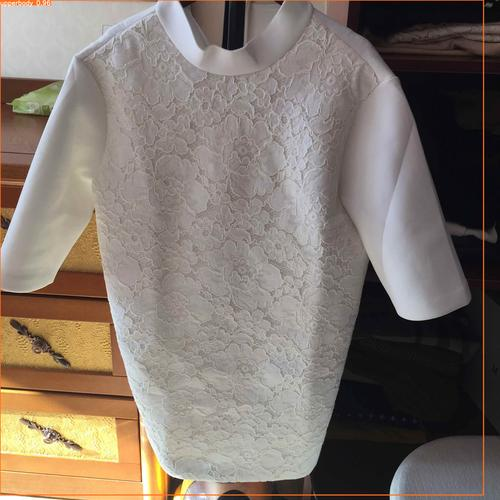
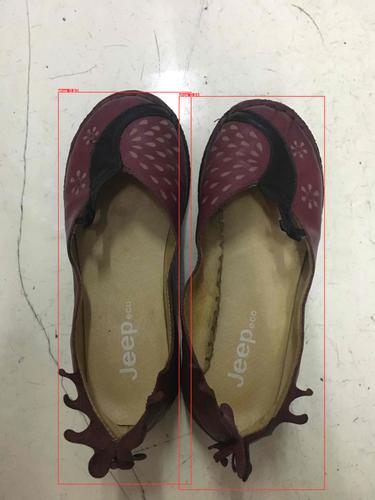
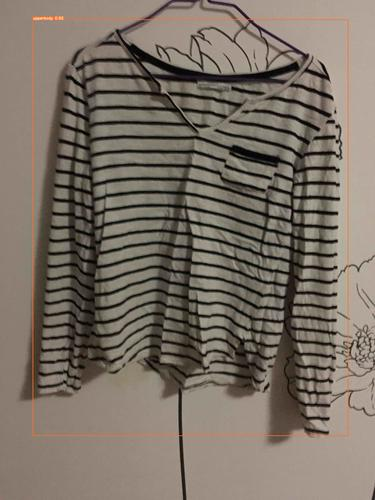
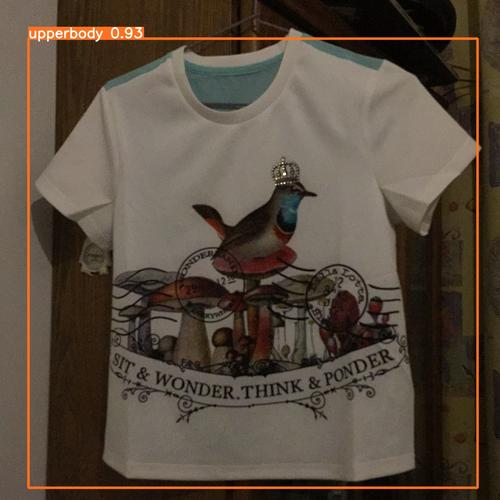
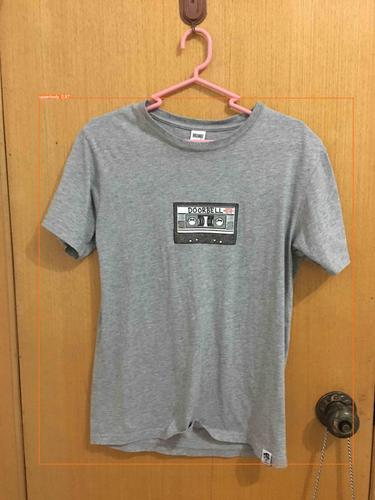
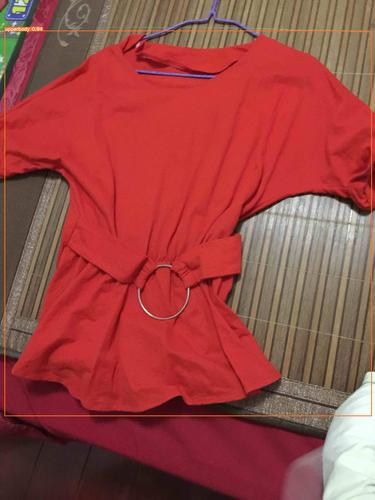
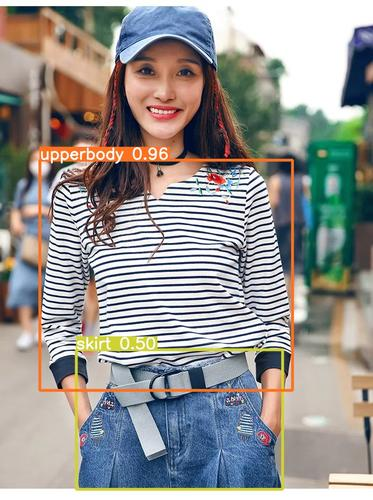
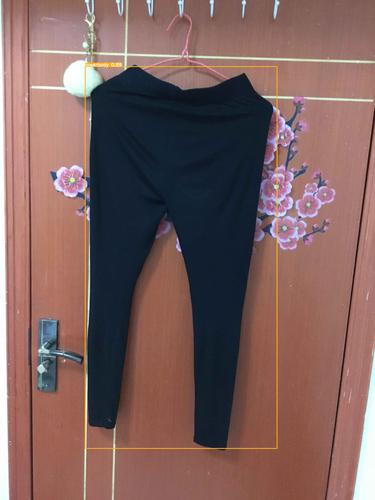
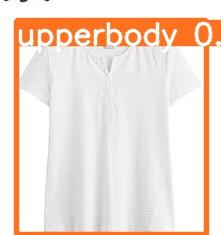
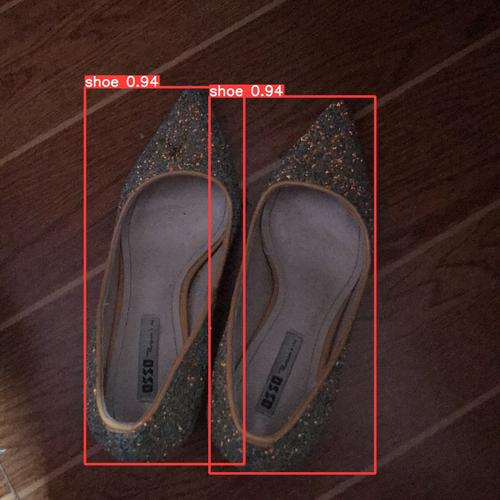
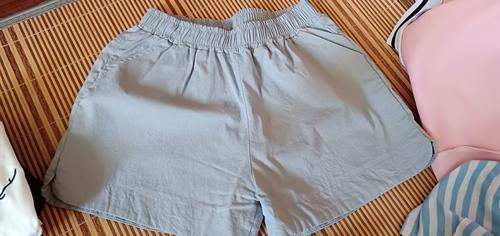
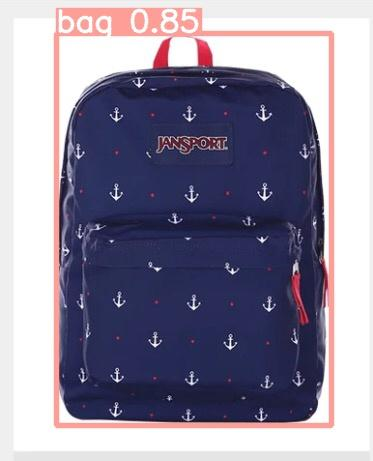
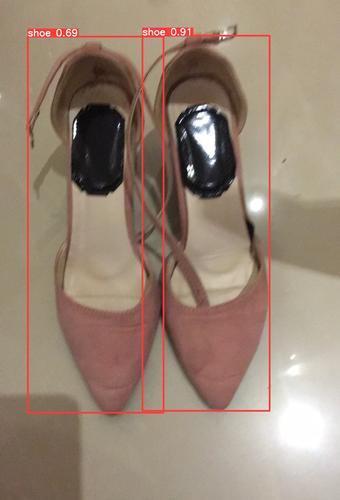
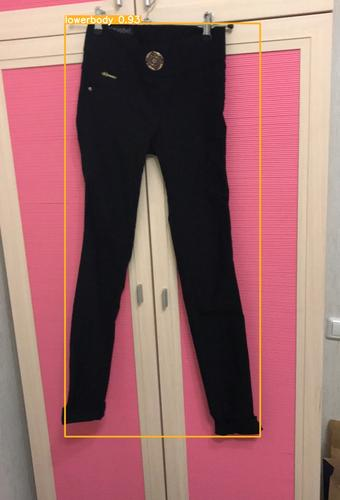
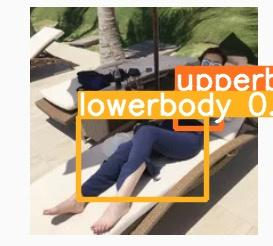
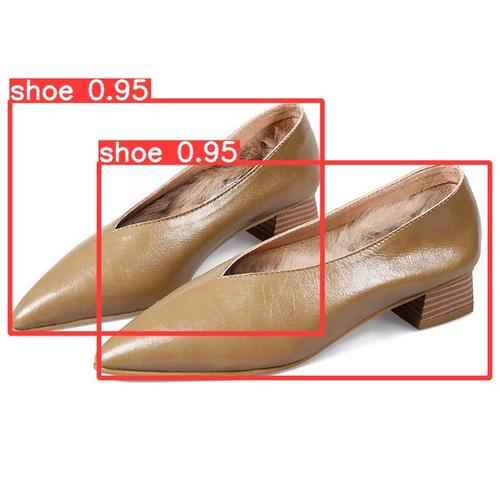
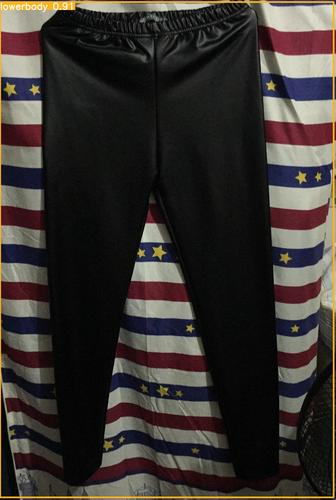
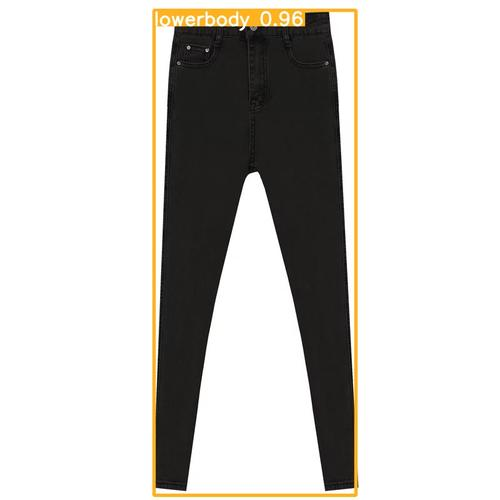
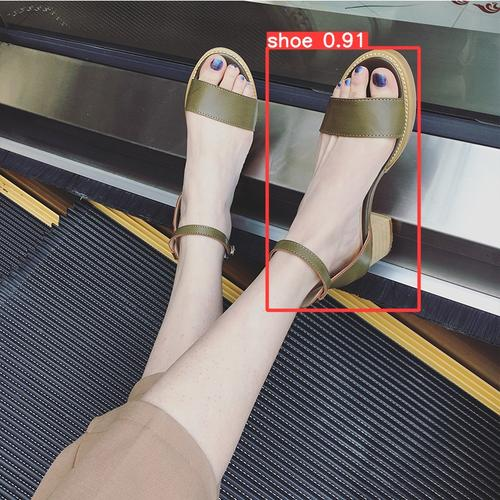
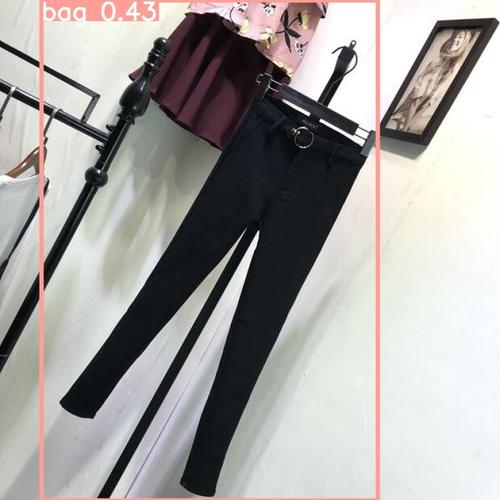
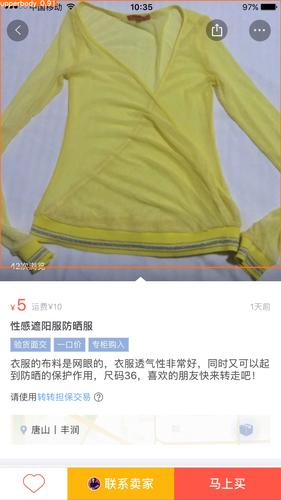
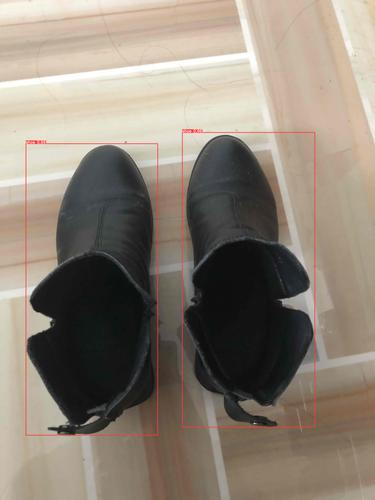
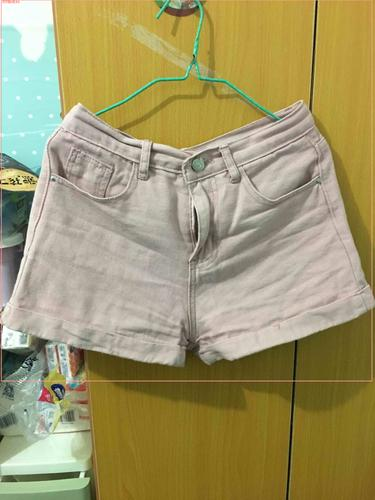
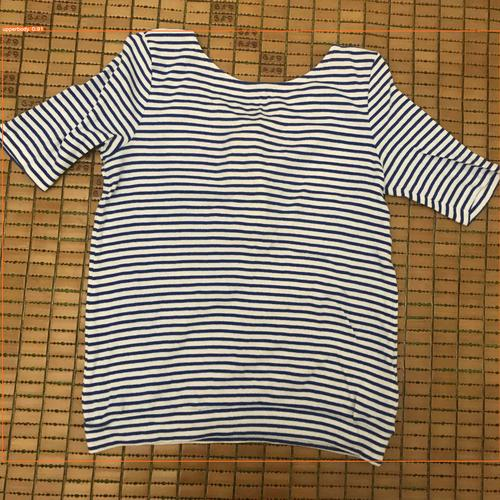
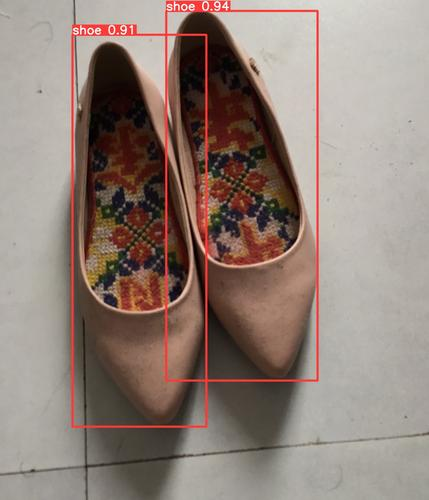
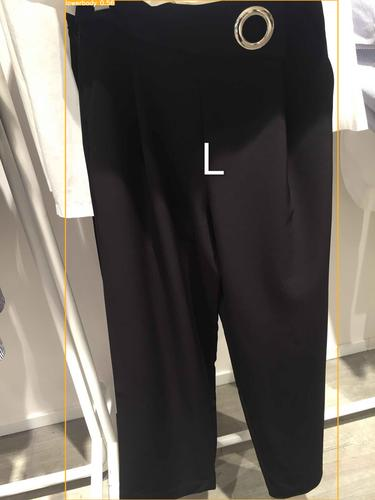
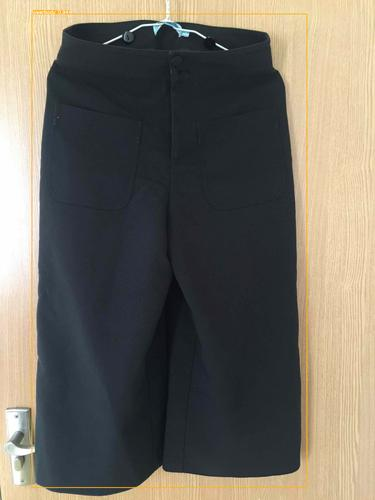
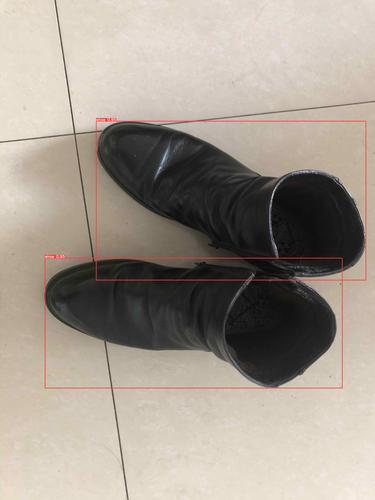
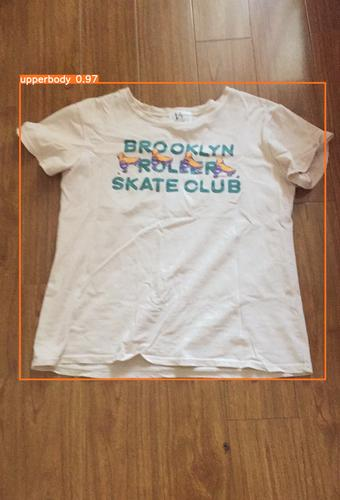
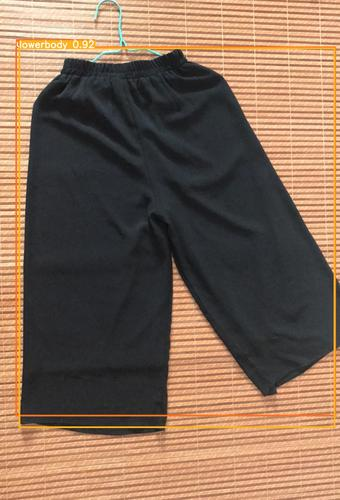
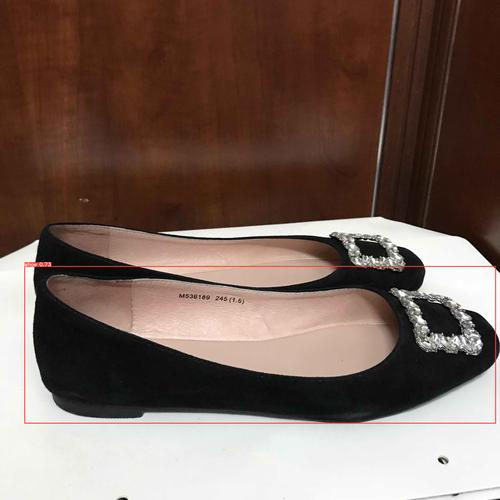
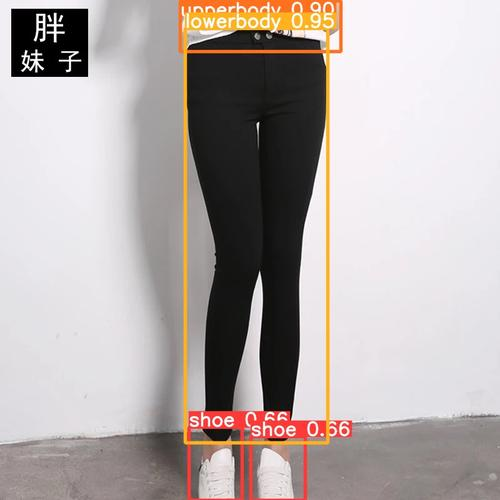
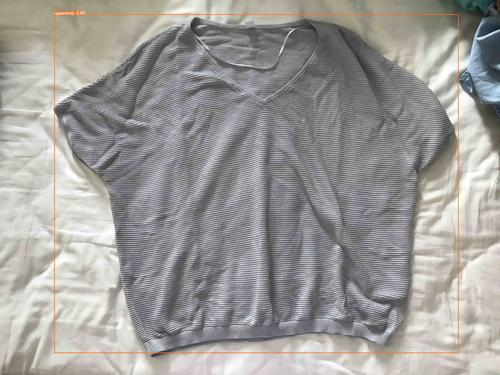
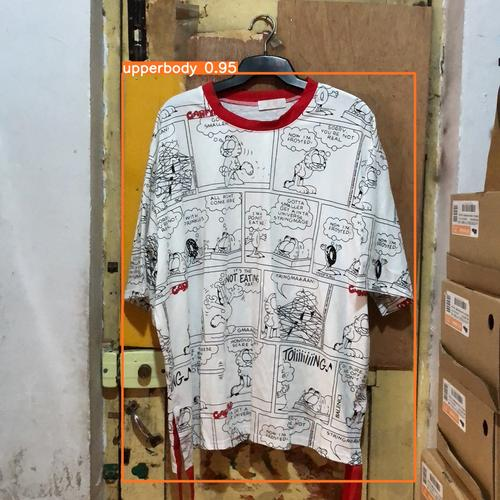
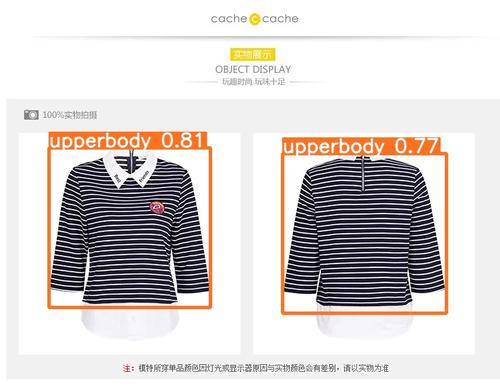
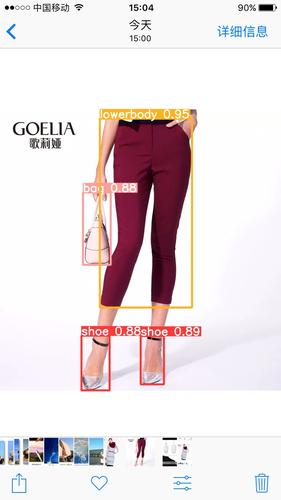
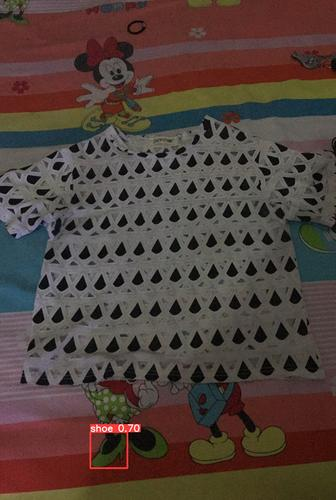
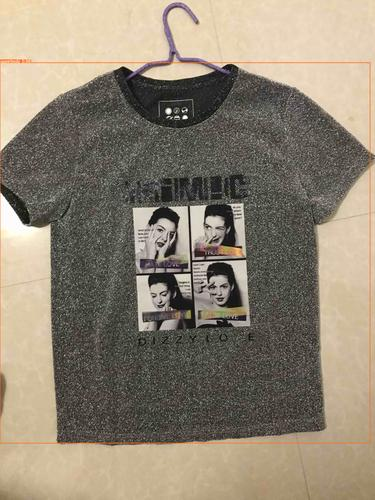
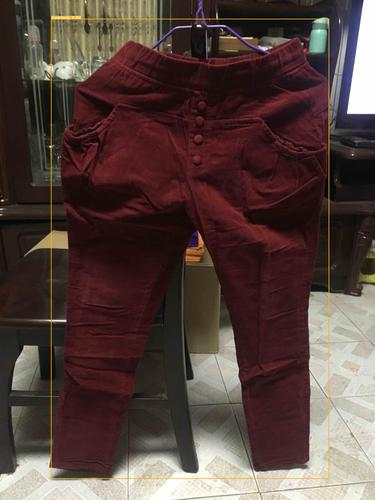
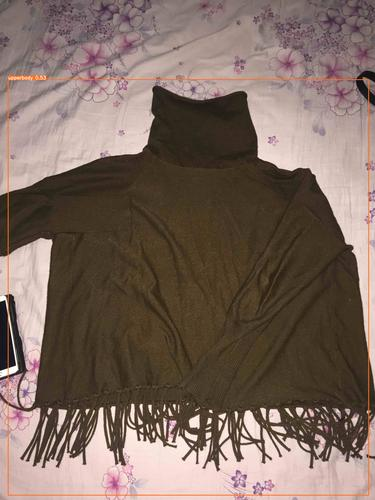
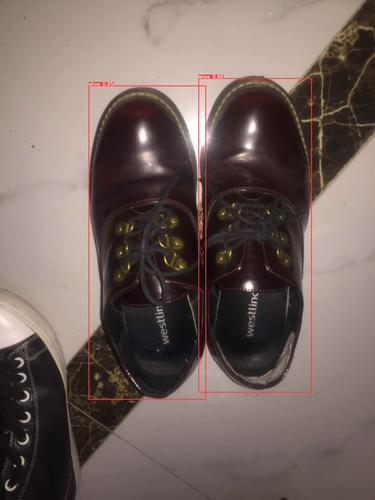
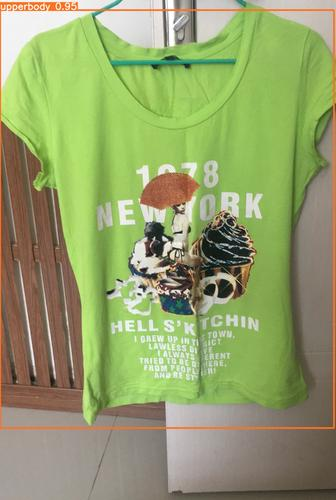
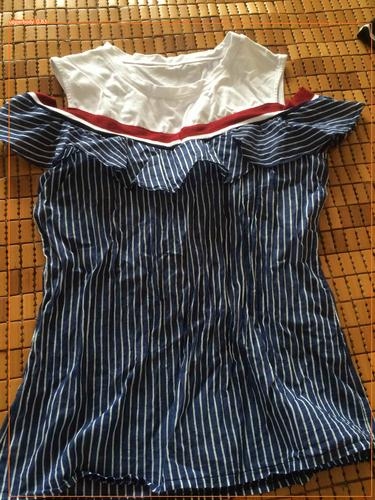
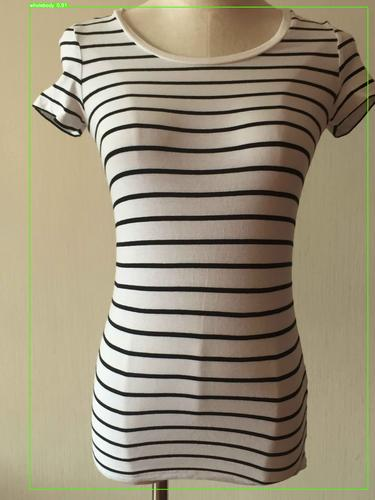
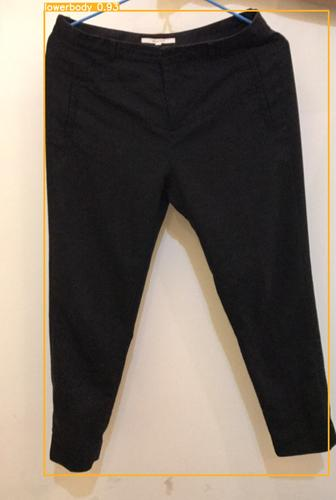
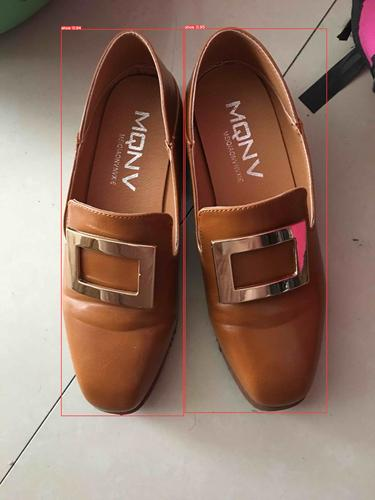
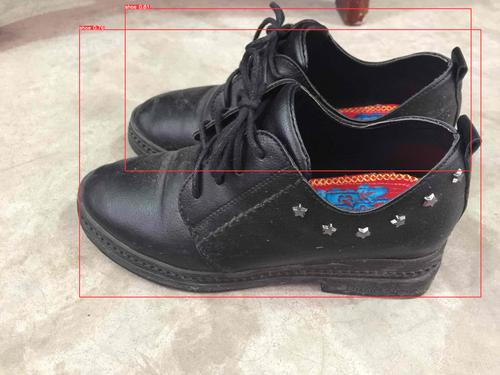
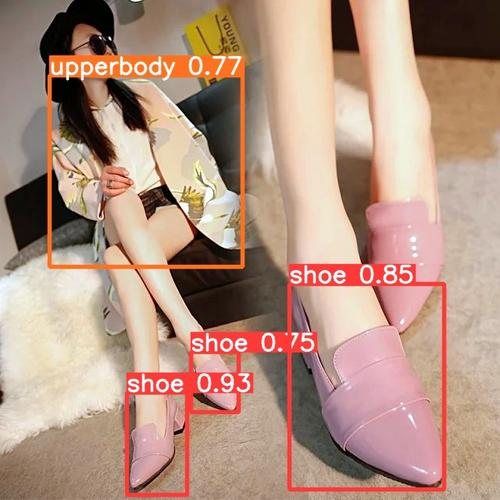
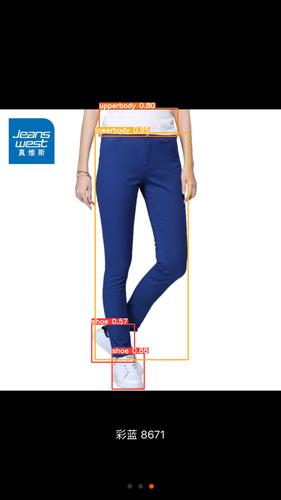
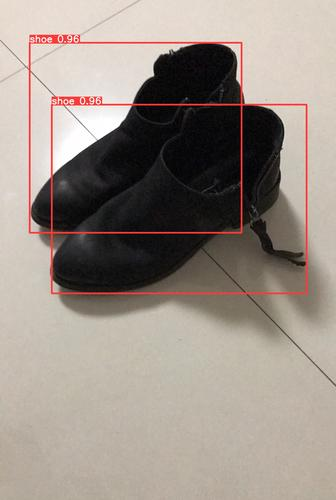
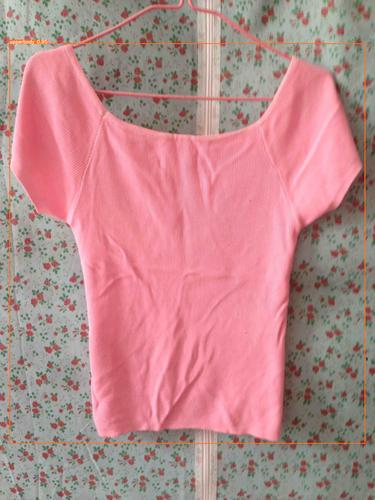
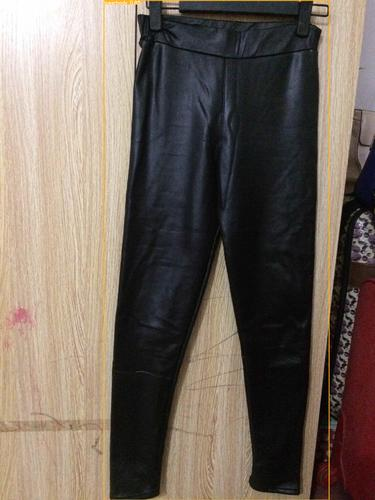
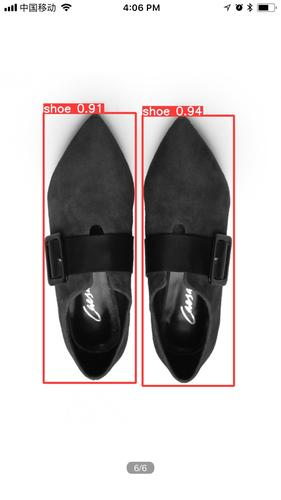
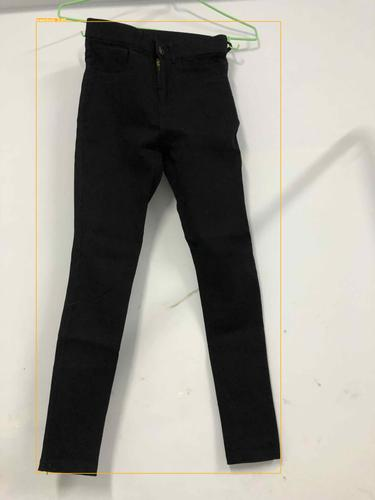
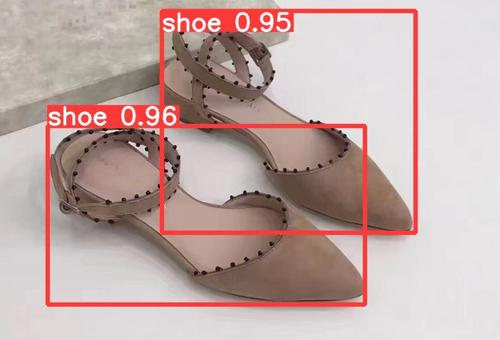
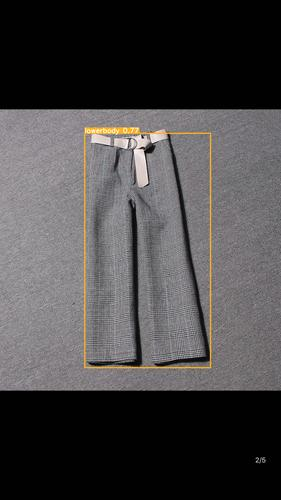
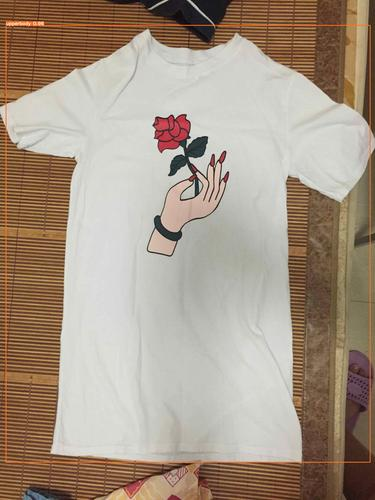
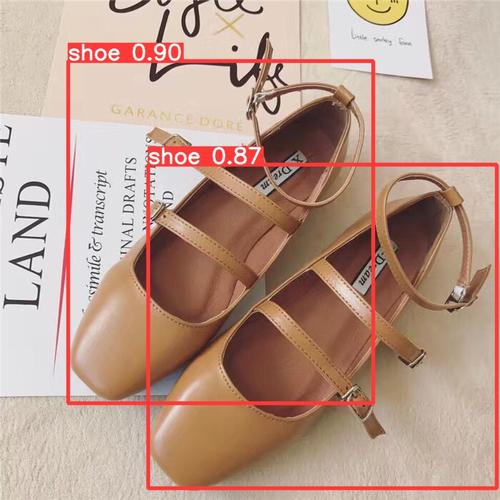
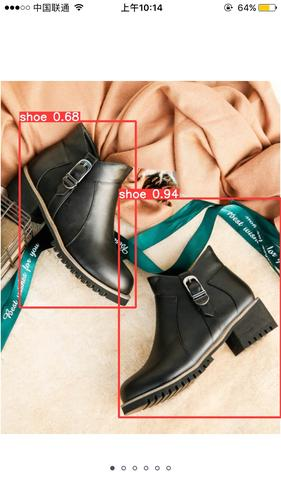
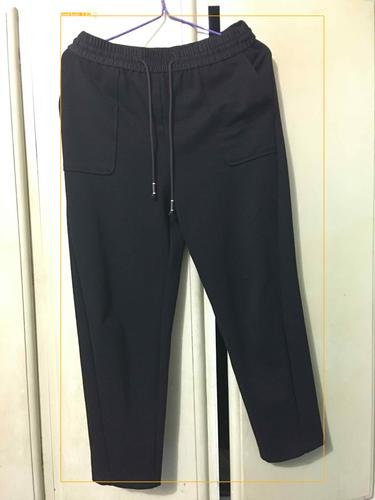
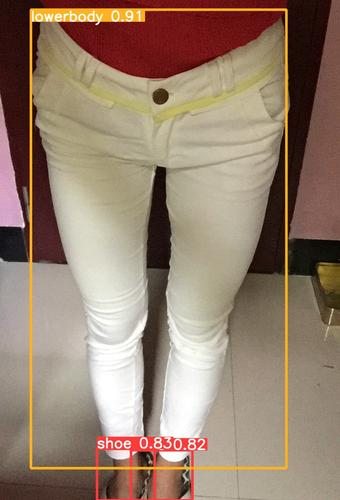
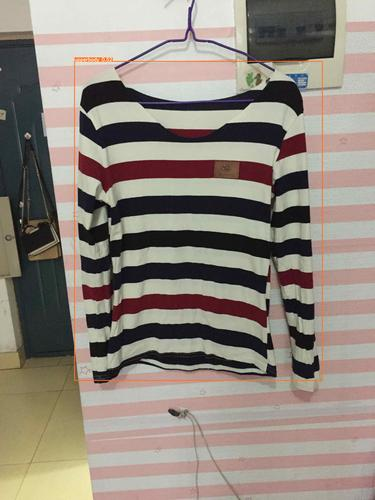

In [80]:
HTML(f)

### 解析json文件

In [ ]:
json_list = glob.glob('/home/chenyi/workspace/dataset/haowei34k_labelImg/xml_label/*/*.json')

In [ ]:
json_df = pd.DataFrame()
json_df['spath'] = json_list

In [ ]:
xml_dir = Path('/home/chenyi/workspace/dataset/haowei34k_labelImg/json2xml/')

In [ ]:
json_df['tpath'] = json_df['spath'].apply(lambda x:
                                         '{0}/{1}'.format(xml_dir, re.findall(r'/[0-9]{1,3}/(.*?.json)',x)[0]))

In [ ]:
sys.path.append('/home/chenyi/workspace/myPyModule99/data_format/json_to_xml')
from json_to_xml.main import *

In [ ]:
root_json_dir = xml_dir
root_save_xml_dir = '/home/chenyi/workspace/dataset/haowei34k_labelImg/json2xml/xml'

In [ ]:
import json
for json_filename in tqdm(os.listdir(root_json_dir)):
    json_path = os.path.join(root_json_dir, json_filename)
    json_data = json.load(open(json_path))
    break

In [ ]:
json_df['path'] = glob.glob(str(root_json_dir/'*.json'))

In [ ]:
json_df['fname'] =  json_df['path'].apply(lambda x: re.findall(r'/json2xml/(.*?).json',x)[0])

In [ ]:
json_labels = {}
for ind,row in tqdm(json_df.iterrows()):
    json_path = row['path']
    fname = row['fname']
    json_data = json.load(open(json_path))
    json_labels[fname] = ''
    for item in json_data['shapes']:
        name = item['label']
        points = item['points']
        xmin, ymin = points[0]
        xmax, ymax = points[1]
        
        if name not in classes_name.keys():
            classes_name[name] = len(classes_name)
        json_labels[fname] += '{} {:6f} {:6f} {:6f} {:6f}\n'.format(
            classes_name[name], xmin, ymin, xmax, ymax)

In [ ]:
fname_list = []
xmin_list = []
ymin_list = []
xmax_list = []
ymax_list = []
labels_list = []
for ind,row in tqdm(json_df.iterrows()):
    json_path = row['path']
    fname = row['fname']
    json_data = json.load(open(json_path))
    for item in json_data['shapes']:
        name = item['label']
        points = item['points']
        xmin, ymin = points[0]
        xmax, ymax = points[1]
        
        fname_list.append(fname)
        labels_list.append(name)
        xmin_list.append(xmin)
        ymin_list.append(ymin)
        ymax_list.append(ymax)
        xmax_list.append(xmax)

In [ ]:
json_bboxes = pd.DataFrame()

In [ ]:
json_bboxes['fname'] = fname_list
json_bboxes['label'] = labels_list
json_bboxes['xmin'] = xmin_list
json_bboxes['ymin'] = ymin_list
json_bboxes['xmax'] = xmax_list
json_bboxes['ymax'] = ymax_list

In [ ]:
json_bboxes.head()

### pandas处理

In [23]:
labels_p

PosixPath('../../dataset/haowei34k_labelImg/haowei34k_catg45/xml')

In [24]:
xml_list = glob.glob(str(labels_p /'*.xml'))
xmlFiles = [re.findall(r'/xml/(.*?.xml)',x)[0] for x in xml_list]
fname_list = []
xmin_list = []
ymin_list = []
xmax_list = []
ymax_list = []
labels_list = []
for ind,xmlFile in tqdm(enumerate(xmlFiles)):
    trees = etree.parse(labels_p /xmlFile)
    width, height = int(trees.find('size/width').text), int(trees.find('size/height').text)
    # fname = re.findall(r'[0-9]{1,3}/(.*?).xml',xmlFile)[0]     
    fname = xmlFile[:-4]     

    for obj in trees.findall('object'):
        bdb = obj.find('bndbox')
        name = obj.find('name').text
        xmin = int(bdb.find('xmin').text)
        ymin = int(bdb.find('ymin').text)
        xmax = int(bdb.find('xmax').text)
        ymax = int(bdb.find('ymax').text)
        
        fname_list.append(fname)
        labels_list.append(name)
        xmin_list.append(xmin)
        ymin_list.append(ymin)
        ymax_list.append(ymax)
        xmax_list.append(xmax)

33411it [00:01, 20297.55it/s]


In [25]:
xml_bboxes = pd.DataFrame()
xml_bboxes['fname'] = fname_list
xml_bboxes['label'] = labels_list
xml_bboxes['xmin'] = xmin_list
xml_bboxes['ymin'] = ymin_list
xml_bboxes['xmax'] = xmax_list
xml_bboxes['ymax'] = ymax_list

In [26]:
xml_bboxes.head()

,fname,label,xmin,ymin,xmax,ymax
0,20160425101358677,正装女鞋,225,584,258,669
1,20160425101358677,正装女鞋,256,672,305,768
2,20160425101358677,连衣裙,157,136,357,468
3,20160425101358677,包,118,135,222,413
4,20170818201332676,牛仔,447,308,745,767


In [27]:
xml_bboxes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144122 entries, 0 to 144121
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   fname   144122 non-null  object
 1   label   144122 non-null  object
 2   xmin    144122 non-null  int64 
 3   ymin    144122 non-null  int64 
 4   xmax    144122 non-null  int64 
 5   ymax    144122 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 6.6+ MB


In [28]:
labelme_df = xml_bboxes

In [ ]:
# labelme_df.to_csv('/home/chenyi/workspace/dataset/haowei34k_labelImg/labelme_hw34k.csv', index=False)

In [30]:
labelme_df['label'].value_counts().axes,len(labelme_df['label'].value_counts().axes[0])

([Index(['正装女鞋', '正装女鞋（宽容型）', '包', '裙子', '休闲裤', '毛衣/绒衣/针织衫', '牛仔裤', '休闲裤（宽容型）',
         '连衣裙', '连衣裙（严格型）',
         ...
         '正装你学', '毛衣/绒衣/针织衫衫', '版鞋', '毛衣/绒衣//针织衫', '/外套', '板鞋\t', '女衫 ', '羊羔毛',
         '牛', '衬衫 '],
        dtype='object', length=149)],
 149)

In [31]:
import pickle
with open('labelme_names_dict.pickle', 'rb') as f:
    names_dict = pickle.load(f)

In [53]:
# import pickle
# # with open('labelme_names_dict.pickle', 'wb') as f:
#     pickle.dump(names_dict, f)

In [52]:
labelme_df['label43'] = labelme_df['label'].apply(lambda x: names_dict[x])

In [63]:
labelme_df.to_csv('labelme_voc_bboxes_relabel.csv', index=False)

In [55]:
labelme_df['label43'].value_counts()

正装女鞋         44481
包            20515
休闲裤           8833
半身裙           7625
毛衣/绒衣/针织衫     7225
连衣裙           6941
牛仔裤           6875
女衫类           4035
帆布鞋           3767
凉鞋            3225
板鞋            2888
小西装           2670
夹克外套          2355
运动鞋           2182
背心            2180
皮衣外套          1741
拖鞋            1495
卫衣            1490
大衣            1449
打底裤           1305
懒人鞋           1294
牛仔外套          1046
西装裤           1001
T恤             932
豆豆鞋            836
松糕鞋            663
衬衫             576
皮裤             522
吊带             504
连衣裤            426
雪地靴            422
风衣             417
棉衣/羊羔绒         386
马甲             376
休闲鞋            343
皮草             321
羽绒服            246
运动裤            166
帽子             156
网鞋              60
抹胸              47
棒球服             46
斗篷              36
洞洞鞋             12
POLO衫           11
Name: label43, dtype: int64

In [76]:
root = Path('/home/chenyi/workspace/dataset/haowei34k/')

In [77]:
imgs_list = glob.glob(str(root /'images/*/*.jpg'))

In [78]:
imgs_df = pd.DataFrame()
imgs_df['path'] = imgs_list

In [98]:
import re

In [102]:
imgs_df['fname']= imgs_df['path'].apply(lambda x: re.findall(r'images/.*?/(.*?).jpg', x)[0])

In [103]:
imgs_df.head(2).values

array([['/home/chenyi/workspace/dataset/haowei34k/images/train/20160406001119728.jpg',
        '20160406001119728'],
       ['/home/chenyi/workspace/dataset/haowei34k/images/train/20141110184352626.jpg',
        '20141110184352626']], dtype=object)

In [ ]:
_ = [os.symlink(p, p.replace()) for p in imgs_list]

In [114]:
labelme_df['fname'] = labelme_df['fname'].astype(str)

In [120]:
imgs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34020 entries, 0 to 34019
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   path    34020 non-null  object
 1   fname   34020 non-null  object
dtypes: object(2)
memory usage: 531.7+ KB


In [115]:
labelme_df.drop_duplicates('fname').info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33411 entries, 0 to 144118
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   fname    33411 non-null  object
 1   label    33411 non-null  object
 2   xmin     33411 non-null  int64 
 3   ymin     33411 non-null  int64 
 4   xmax     33411 non-null  int64 
 5   ymax     33411 non-null  int64 
 6   label43  33411 non-null  object
dtypes: int64(4), object(3)
memory usage: 2.0+ MB


In [110]:
x = labelme_df[~labelme_df['fname'].isin(imgs_df['fname'])]

In [116]:
y = imgs_df[~imgs_df['fname'].isin(labelme_df['fname'])]

In [122]:
y.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 609 entries, 194 to 33973
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   path    609 non-null    object
 1   fname   609 non-null    object
dtypes: object(2)
memory usage: 14.3+ KB


In [125]:
labelme_df.head()

,fname,label,xmin,ymin,xmax,ymax,label43
0,20160425101358677,正装女鞋,225,584,258,669,正装女鞋
1,20160425101358677,正装女鞋,256,672,305,768,正装女鞋
2,20160425101358677,连衣裙,157,136,357,468,连衣裙
3,20160425101358677,包,118,135,222,413,包
4,20170818201332676,牛仔,447,308,745,767,牛仔外套


In [123]:
root

PosixPath('/home/chenyi/workspace/dataset/haowei34k')

In [58]:
from PIL import Image

In [128]:
w_list = []
h_list = []
for ind, row in tqdm(imgs_df.iterrows()):
    p_ = row['path']
    try:
        img = Image.open(str(p_))
        w,h = img.size
    except:
        w,h = 0,0
        print(p_)
    w_list.append(w)
    h_list.append(h)  

34020it [00:06, 5175.93it/s]


In [133]:
imgs_df['width'] = w_list
imgs_df['height'] = h_list

In [139]:
imgs_df['mode'] = imgs_df['path'].apply(lambda x: re.findall(r'/images/([a-z]{3,5})/', x)[0])

In [143]:
val_df = imgs_df[imgs_df['mode']=='val']

In [144]:
labelme_df['mode'] = 'train'

In [150]:
labelme_df.loc[labelme_df[labelme_df['fname'].isin(val_df['fname'])].index,'mode'] = 'val'

In [156]:
labelme_df['width'] = w_list
labelme_df['height'] = h_list

In [163]:
names_lab2num = {}
for k,v in names.items():
    names_lab2num[v[0]] = k

In [168]:
labelme_df.to_csv('haowei34k_voc_bboxes_relabel.csv', index=False)

In [166]:
labelme_df['label_num'] = labelme_df['label43'].apply(lambda x:
                                                     names_lab2num[x])